# Data Understanding

In [52]:
import pandas as pd
import datetime as dt
import warnings

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [53]:
df_ = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2009-2010")

In [54]:
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [56]:
def missing_plot(dataset, key):
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns=['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum())) / len(dataset[key]) * 100, columns=['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(
        x=null_feat.index,
        y=null_feat['Count'],
        opacity=0.8,
        text=percentage_null['Count'],
        textposition='auto',
        marker=dict(
            color='#7EC0EE', 
            line=dict(
                color='#000000',
                width=1.5
            )
        ),
        width=0.5,  
    )

    layout = dict(title="Missing Values (count & %)", plot_bgcolor='rgba(0,0,0,0)', 
                  xaxis=dict(title="Features"), yaxis=dict(title="Count"))

    fig = go.Figure(data=[trace], layout=layout)
    py.iplot(fig)

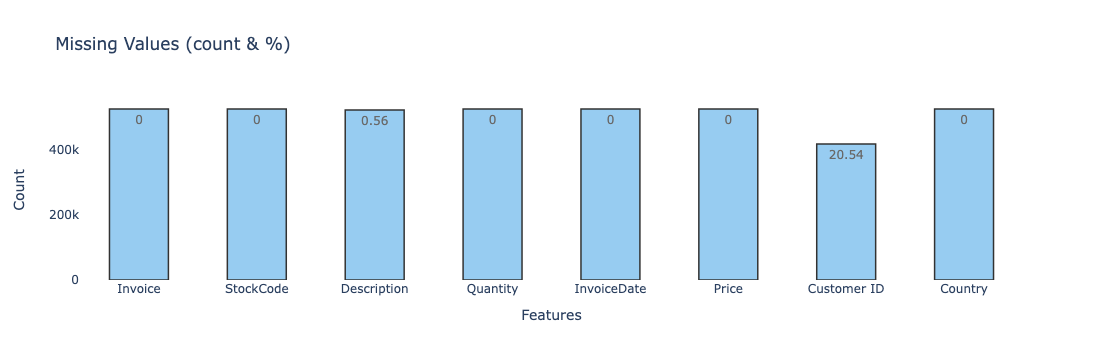

In [57]:
missing_plot(df, 'Invoice')

In [58]:
df["Description"].nunique()

4681

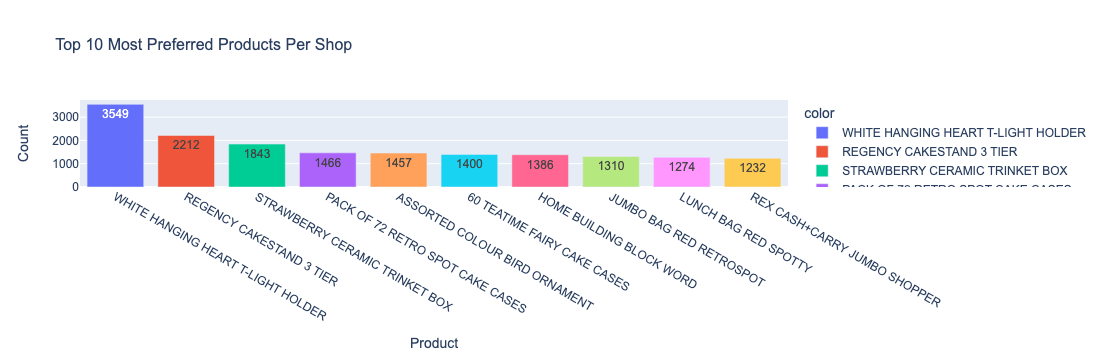

In [59]:
most_preferred_products = df['Description'].value_counts()[:10]

fig = px.bar(x=most_preferred_products.index,
             y=most_preferred_products.values,
             color=most_preferred_products.index,
             text=most_preferred_products.values,
             title="Top 10 Most Preferred Products Per Shop",
             labels={'x': 'Product', 'y': 'Count'})

fig.update_layout(
    xaxis_title="Product",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

fig.show()

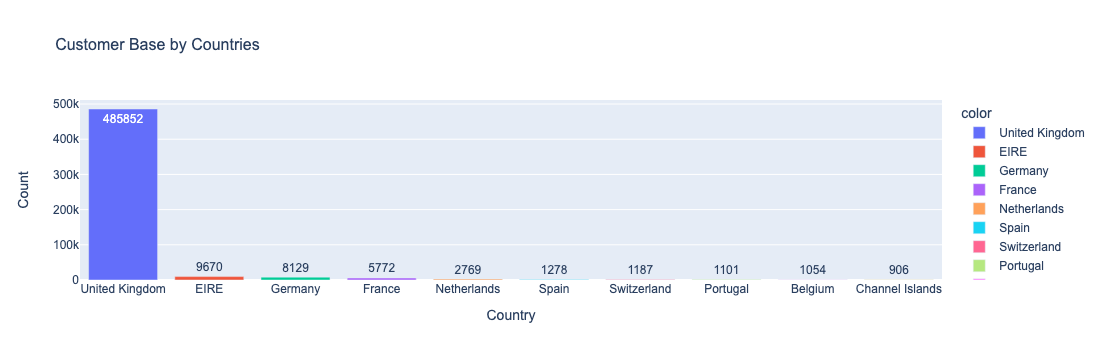

In [60]:
countries = df['Country'].value_counts()[:10]

fig = px.bar(x=countries.index,
             y=countries.values,
             color=countries.index,
             text=countries.values,
             title="Customer Base by Countries",
             labels={'x': 'Country', 'y': 'Count'})

fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

fig.show()


In [61]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925


In [62]:
df["Invoice"].nunique()

28816

In [63]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [64]:
df.groupby("Invoice").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).head()

,TotalPrice
Invoice,
533027,49844.990
531516,45332.970
493819,44051.600
524181,33167.800
526934,26007.080


# Data Preparation

In [65]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
TotalPrice          0
dtype: int64

In [66]:
df.dropna(inplace=True)

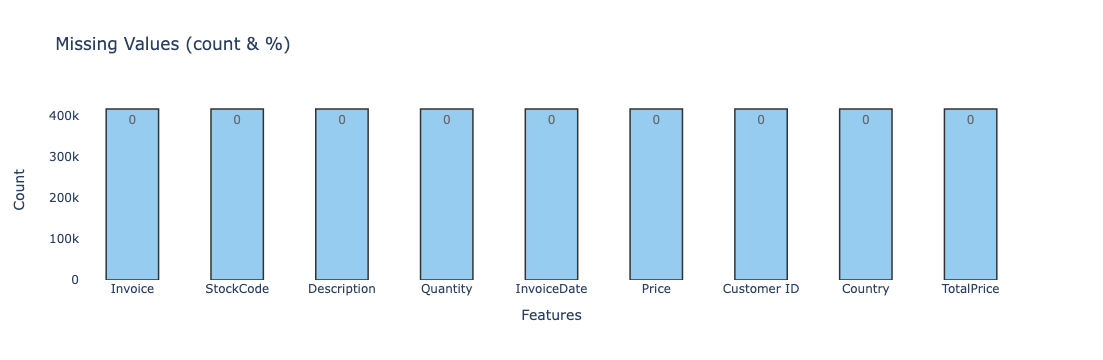

In [67]:
missing_plot(df, 'Customer ID')

In [68]:
df.shape

(417534, 9)

In [69]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,417534.000,12.759,-9360.000,2.000,4.000,12.000,19152.000,101.220
InvoiceDate,417534,2010-07-01 01:12:19.787609856,2009-12-01 07:45:00,2010-03-26 11:26:00,2010-07-08 19:12:00,2010-10-14 14:08:00,2010-12-09 20:01:00,NaN
Price,417534.000,3.888,0.000,1.250,1.950,3.750,25111.090,71.132
Customer ID,417534.000,15360.645,12346.000,13983.000,15311.000,16799.000,18287.000,1680.811
TotalPrice,417534.000,19.994,-25111.090,4.250,11.250,19.350,15818.400,99.916


In [70]:
df['Invoice'] = df['Invoice'].astype(str)
df_refunded = df[df['Invoice'].str.contains('C')]

df_refunded.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.950,16321.000,Australia,-35.400
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.650,16321.000,Australia,-9.900
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.250,16321.000,Australia,-17.000
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.100,16321.000,Australia,-12.600
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.950,16321.000,Australia,-35.400


In [71]:
df_refunded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9839 entries, 178 to 525282
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      9839 non-null   object        
 1   StockCode    9839 non-null   object        
 2   Description  9839 non-null   object        
 3   Quantity     9839 non-null   int64         
 4   InvoiceDate  9839 non-null   datetime64[ns]
 5   Price        9839 non-null   float64       
 6   Customer ID  9839 non-null   float64       
 7   Country      9839 non-null   object        
 8   TotalPrice   9839 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 768.7+ KB


In [72]:
df = df[~df["Invoice"].str.contains("C", na = False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407695 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
 8   TotalPrice   407695 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.1+ MB


In [73]:
df.shape[0] + df_refunded.shape[0]

417534

In [74]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,407695.000,13.587,1.000,2.000,5.000,12.000,19152.000,96.842
InvoiceDate,407695,2010-07-01 10:10:10.782177792,2009-12-01 07:45:00,2010-03-26 14:01:00,2010-07-09 15:46:00,2010-10-14 17:09:00,2010-12-09 20:01:00,NaN
Price,407695.000,3.294,0.000,1.250,1.950,3.750,10953.500,34.757
Customer ID,407695.000,15368.504,12346.000,13997.000,15321.000,16812.000,18287.000,1679.796
TotalPrice,407695.000,21.663,0.000,4.950,11.900,19.500,15818.400,77.147


In [75]:
df_ZeroPrice = df[df['Price'] == 0]
df_ZeroPrice.shape

(31, 9)

In [76]:
df_ZeroPrice.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.000,16126.000,United Kingdom,0.000
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.000,15658.000,United Kingdom,0.000
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.000,17231.000,United Kingdom,0.000
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.000,14108.000,United Kingdom,0.000
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.000,14108.000,United Kingdom,0.000


In [77]:
df.drop(df[df['Price'] == 0.0].index, inplace=True)

In [78]:
df.shape

(407664, 9)

In [79]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom,83.400
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom,100.800
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom,30.000


#  Extract meaningful insights

In [80]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['date'] = df['InvoiceDate'].dt.strftime('%m/%d/%Y')
df['month'] = df['InvoiceDate'].dt.strftime('%B')
df['week'] = df['InvoiceDate'].dt.strftime('%A')
df['time'] = df['InvoiceDate'].dt.strftime('%H')

In [81]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,date,month,week,time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom,83.400,12/01/2009,December,Tuesday,07
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000,12/01/2009,December,Tuesday,07
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000,12/01/2009,December,Tuesday,07
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom,100.800,12/01/2009,December,Tuesday,07
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom,30.000,12/01/2009,December,Tuesday,07


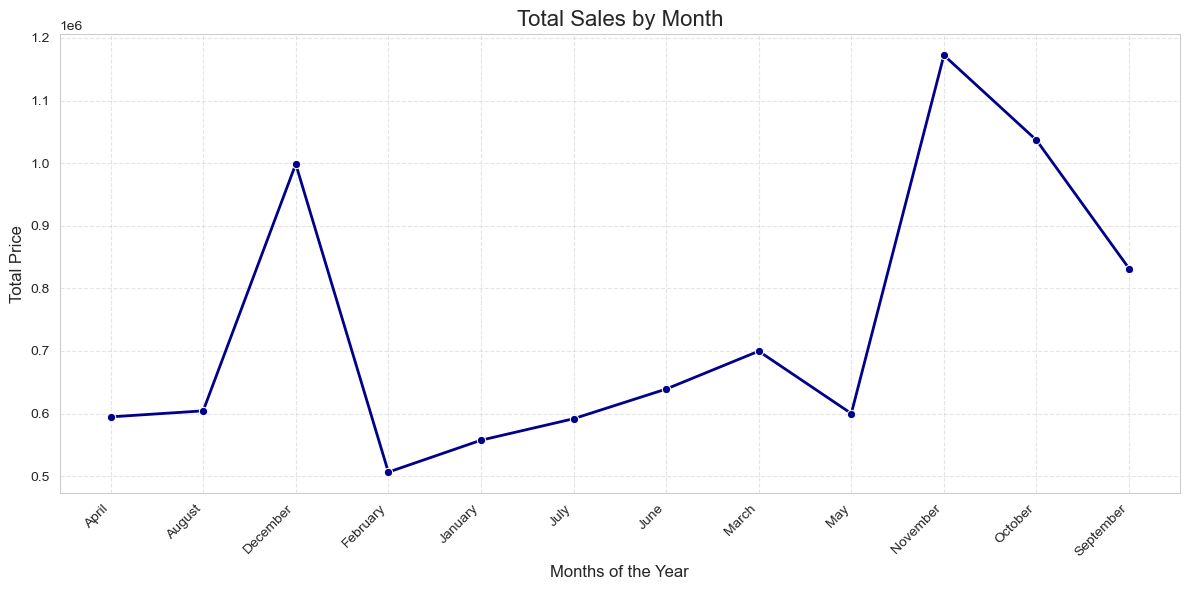

In [82]:
df_months = df.groupby('month').agg({'TotalPrice': 'sum'}).reset_index()

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_months, x='month', y='TotalPrice', marker='o', color='darkblue', linewidth=2)
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Months of the Year', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()

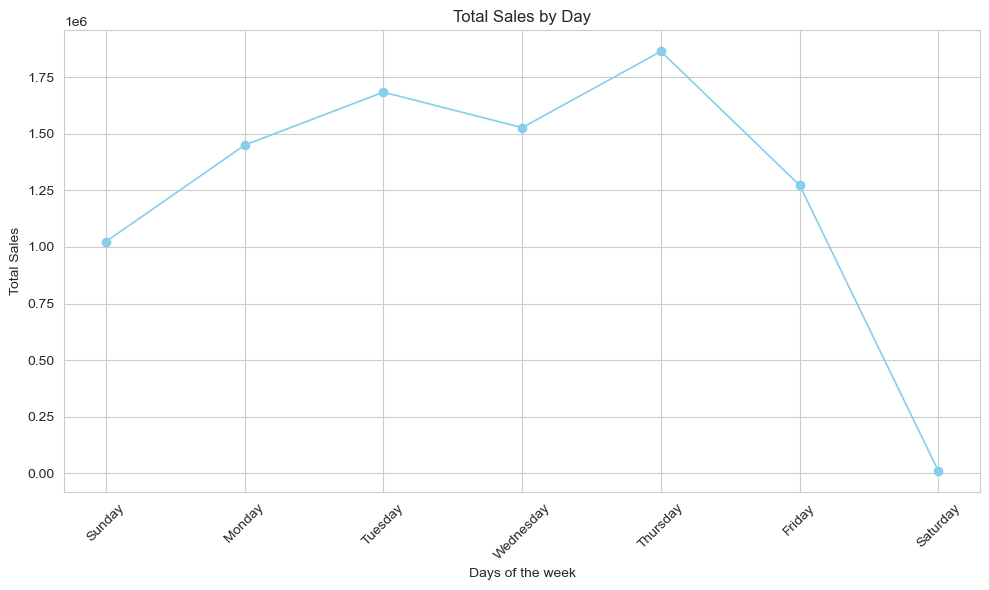

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

daywise = df.groupby('week').agg({'TotalPrice': 'sum'}).reset_index()

daywise['week'] = pd.Categorical(daywise['week'], categories=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ordered=True)
daywise = daywise.sort_values('week')

plt.figure(figsize=(10, 6))
plt.plot(daywise['week'], daywise['TotalPrice'], marker='o', color='skyblue', linewidth=1.2, markersize=6)
plt.title('Total Sales by Day')
plt.xlabel('Days of the week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

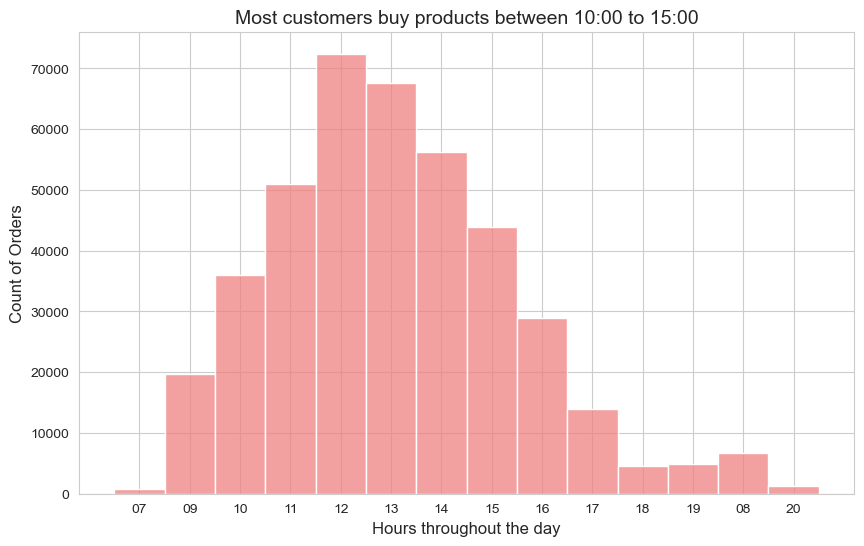

In [84]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time', bins=24, color='lightcoral', kde=False)
plt.xlabel('Hours throughout the day', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.title('Most customers buy products between 10:00 to 15:00', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

#  Calculating RFM Metrics

In [85]:
df["InvoiceDate"].max()

Timestamp('2010-12-09 20:01:00')

In [86]:
today_date = dt.datetime(2010, 12, 11)  

df_rfm = df.groupby('Customer ID').agg(
        {'InvoiceDate': lambda date: (today_date - date.max()).days,
         'Invoice': lambda num: num.nunique(),
         'TotalPrice': lambda price: price.sum()})

In [87]:
df_rfm.columns = ['recency', 'frequency', "monetary"]  # Rename the aggregated columns
df_rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4312.000,91.173,96.861,1.000,18.000,53.000,136.000,374.000
frequency,4312.000,4.456,8.170,1.000,1.000,2.000,5.000,205.000
monetary,4312.000,2048.238,8914.481,2.950,307.988,706.020,1723.142,349164.350


In [88]:
df_rfm["recency_score"] = pd.qcut(df_rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
 
df_rfm["frequency_score"] = pd.qcut(df_rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

df_rfm.head()

,recency,frequency,monetary,recency_score,frequency_score
Customer ID,,,,,
12346.000,165,11,372.860,2,5
12347.000,3,2,1323.320,5,2
12348.000,74,1,222.160,2,1
12349.000,43,3,2671.140,3,3
12351.000,11,1,300.930,5,1


In [89]:
df_rfm['segment'] = df_rfm['recency_score'].astype(str) + df_rfm['frequency_score'].astype(str)
df_rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,segment
Customer ID,,,,,,
12346.000,165,11,372.860,2,5,25
12347.000,3,2,1323.320,5,2,52
12348.000,74,1,222.160,2,1,21
12349.000,43,3,2671.140,3,3,33
12351.000,11,1,300.930,5,1,51


In [90]:
seg_map = {
r'[1-2][1-2]': 'hibernating',
r'[1-2][3-4]': 'at_risk',
r'[1-2]5': 'cant_loose',
r'3[1-2]': 'about_to_sleep',
r'33': 'need_attention',
r'[3-4][4-5]': 'loyal_customers',
r'41': 'promising',
r'51': 'new_customers',
r'[4-5][2-3]': 'potential_loyalists',
r'5[4-5]': 'champions'
    }

df_rfm['segment'] = df_rfm['segment'].replace(seg_map, regex=True)

df_rfm = df_rfm[[ "frequency", "monetary", "segment"]]

df_rfm.index = df_rfm.index.astype(int) 
df_rfm.head()

,frequency,monetary,segment
Customer ID,,,
12346,11,372.860,cant_loose
12347,2,1323.320,potential_loyalists
12348,1,222.160,hibernating
12349,3,2671.140,need_attention
12351,1,300.930,new_customers


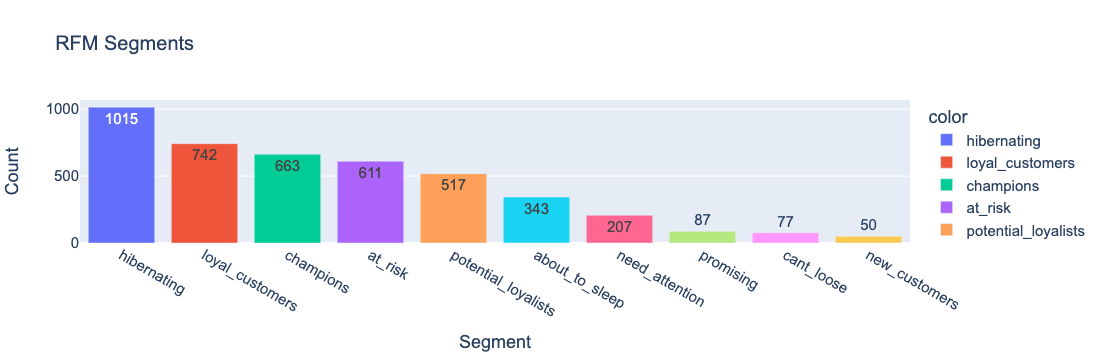

In [91]:
segments = df_rfm['segment'].value_counts()

fig = px.bar(x=segments.index,
             y=segments.values,
             color=segments.index,
             text=segments.values,
             title="RFM Segments",
             labels={'x': 'Product', 'y': 'Count'})

fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial")
)


fig.show()


In [92]:
df_rfm[["segment", "frequency", "monetary"]].groupby("segment").agg(["mean", "count","sum"])

frequency             monetary                  
                         mean count   sum     mean count         sum
segment                                                             
about_to_sleep          1.201   343   412  441.320   343  151372.760
at_risk                 3.074   611  1878 1188.878   611  726404.651
cant_loose              9.117    77   702 4099.450    77  315657.650
champions              12.554   663  8323 6852.264   663 4543051.143
hibernating             1.126  1015  1143  403.978  1015  410037.504
loyal_customers         6.830   742  5068 2746.067   742 2037581.976
need_attention          2.449   207   507 1060.357   207  219493.900
new_customers           1.000    50    50  386.199    50   19309.960
potential_loyalists     2.017   517  1043  729.511   517  377157.180
promising               1.000    87    87  367.087    87   31936.550